In [2]:
from huggingface_hub import hf_hub_download
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay)

In [3]:
df_articles = pd.read_csv(hf_hub_download("fabiochiu/medium-articles", repo_type="dataset",
                  filename="medium_articles.csv"))
df_articles.head()

medium_articles.csv:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\srinivasareddyb\.cache\huggingface\hub\datasets--fabiochiu--medium-articles. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [9]:
df_articles.columns

Index(['title', 'text', 'url', 'authors', 'timestamp', 'tags'], dtype='object')

In [10]:
df_articles['url'].value_counts

<bound method IndexOpsMixin.value_counts of 0         https://medium.com/invisible-illness/mental-no...
1         https://medium.com/age-of-awareness/how-the-pa...
2         https://medium.com/neodotlife/mind-your-nose-f...
3         https://medium.com/science-for-real/the-4-purp...
4         https://medium.com/live-your-life-on-purpose/s...
                                ...                        
192363    https://medium.com/@ozneedcleaningau/why-do-yo...
192364    https://medium.com/@a198blwt/daily-cleaning-an...
192365    https://medium.com/@princegohil/beneficial-adv...
192366    https://medium.com/@lifeinromania/how-i-learne...
192367    https://medium.com/toshuo/trying-pimsleur-cant...
Name: url, Length: 192368, dtype: object>

In [14]:
df_articles['is_data_science'] = df_articles["tags"].apply(lambda tags_list: "Data Science" in tags_list)
df_articles['full_text'] = df_articles["title"] + " " + df_articles["text"]
df_articles.head()

,title,text,url,authors,timestamp,tags,is_data_science,full_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False,Mental Note Vol. 24 Photo by Josh Riemer on Un...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False,Your Brain On Coronavirus Your Brain On Corona...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False,Mind Your Nose Mind Your Nose\n\nHow smell tra...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False,The 4 Purposes of Dreams Passionate about the ...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False,Surviving a Rod Through the Head You’ve heard ...


In [15]:
df = pd.concat([
    df_articles[df_articles["is_data_science"]].sample(n=1000),
    df_articles[~df_articles["is_data_science"]].sample(n=1000),
               ])

In [16]:
df.head()

,title,text,url,authors,timestamp,tags,is_data_science,full_text
33710,How to leverage Data Science and Optimization ...,Problem Statement & Objective\n\nIn my example...,https://medium.com/the-innovation/how-to-lever...,['Vikas Garg'],2020-10-20 17:24:59.241000+00:00,"['Operations Research', 'Supply Chain', 'Optim...",True,How to leverage Data Science and Optimization ...
3961,Using Machine Learning to Predict Value of Hom...,Introduction\n\nData products have always been...,https://medium.com/airbnb-engineering/using-ma...,['Robert Chang'],2017-07-17 16:07:24.185000+00:00,"['Machine Learning', 'Data Science', 'AI', 'Te...",True,Using Machine Learning to Predict Value of Hom...
188747,10 things every aspiring data scientist needs ...,The Harvard article “Data Scientist: The Sexie...,https://towardsdatascience.com/10-things-every...,['Ayodele Oluleye'],2018-02-13 22:23:58.226000+00:00,"['Towards Data Science', 'Motivational', 'Data...",True,10 things every aspiring data scientist needs ...
35223,“ImmoScan” — Unravelling the real estate market,"1. Introduction\n\nNowadays, real estate plays...",https://medium.com/techlabsms/immoscan-unravel...,[],2020-09-02 15:10:06.272000+00:00,"['Real Estate', 'Web App Development', 'Data S...",True,“ImmoScan” — Unravelling the real estate marke...
19279,Types of Ensemble methods in Machine learning.,"In my previous article, we discussed about the...",https://towardsdatascience.com/types-of-ensemb...,['Anju Rajbangshi'],2020-06-07 14:38:13.176000+00:00,"['Machine Learning', 'Data Science', 'Ensemble...",True,Types of Ensemble methods in Machine learning....


In [17]:
X = df[["full_text"]]
y = df["is_data_science"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

In [18]:
vectorizer = CountVectorizer(ngram_range=(1,1))
full_texts_vectorized = vectorizer.fit_transform(X_train["full_text"])
model = LogisticRegression()
model.fit(full_texts_vectorized, y_train)

C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
full_texts_vectorized = vectorizer.transform(X_test["full_text"])
predictions = model.predict(full_texts_vectorized)

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.85      0.93      0.89       200
        True       0.92      0.83      0.88       200

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



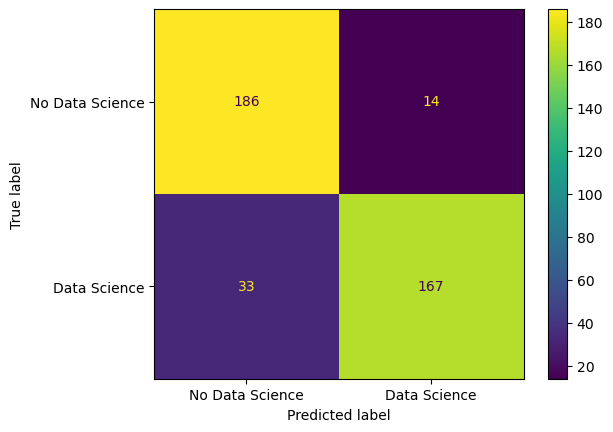

In [21]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No Data Science", "Data Science"])
p = disp.plot()
fig = p.figure_
fig.set_facecolor('white')

In [22]:
ngram_indices_sorted = sorted(list(vectorizer.vocabulary_.items()), key=lambda t: t[1])
ngram_sorted = list(zip(*ngram_indices_sorted))[0]
ngram_weight_pairs = list(zip(ngram_sorted, model.coef_[0]))
ngram_weight_pairs_sorted = sorted(ngram_weight_pairs, key=lambda t: t[1], reverse=True)
ngram_weight_pairs_sorted[:20]

[('de', 0.8501640787553004),
 ('python', 0.7605288851252814),
 ('science', 0.6340539433081998),
 ('metadatos', 0.5112956374716778),
 ('píldoras', 0.5112956374716778),
 ('receta', 0.5112956374716778),
 ('sequel', 0.5023943876519797),
 ('data', 0.4760365667951744),
 ('hmmlearn', 0.474795923548407),
 ('machine', 0.451982635906341),
 ('charts', 0.4311121729287873),
 ('scratch', 0.4296874903817363),
 ('analysis', 0.41892706069780017),
 ('linear', 0.4115475129780072),
 ('follow', 0.40617563949340396),
 ('basit', 0.3769486932679196),
 ('ile', 0.3769486932679196),
 ('grafiti', 0.37448100994290734),
 ('graphs', 0.37202077021132823),
 ('notebook', 0.3427515874520426)]

In [23]:
def predict_is_data_science(sample_text):
    """Predict if the given sample text is related to data science."""
    text_vectorized = vectorizer.transform([sample_text])
    prediction = model.predict(text_vectorized)
    return bool(prediction[0])

In [27]:
# Example usage
sample_text = "This article discusses Python libraries for data analysis and machine learning."
print(predict_is_data_science(sample_text)) 

True
